# Task 4: Loan Approval Prediction
## Description
- Dataset (Recommended): Loan-Approval-Prediction-Dataset (Kaggle)
- Build a model to predict whether a loan application will be approved
- Handle missing values and encode categorical features
- Train a classification model and evaluate performance on imbalanced data
- Focus on precision, recall, and F1-score
## Bonus
- Use SMOTE or other techniques to address class imbalance
- Try logistic regression vs. decision tree

# Downloading the dataset

In [1]:
!kaggle datasets download architsharma01/loan-approval-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
License(s): MIT
  0%|                                               | 0.00/80.6k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 80.6k/80.6k [00:00<00:00, 124MB/s]


In [2]:
!unzip loan-approval-prediction-dataset.zip

Archive:  loan-approval-prediction-dataset.zip
  inflating: loan_approval_dataset.csv  


# Inspecting the data and performing EDA

In [1]:
import pandas as pd

# Loading the dataset
loan_approval_data = pd.read_csv('loan_approval_dataset.csv', delimiter=',', header='infer', skipinitialspace=True)

In [2]:
# Checking for null values
loan_approval_data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [3]:
# Checking for duplicates
loan_approval_data.duplicated().sum()

np.int64(0)

In [4]:
# Checking dataset data types
loan_approval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
# Checking the first rows of data
loan_approval_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
# Checking the summary of stats
loan_approval_data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


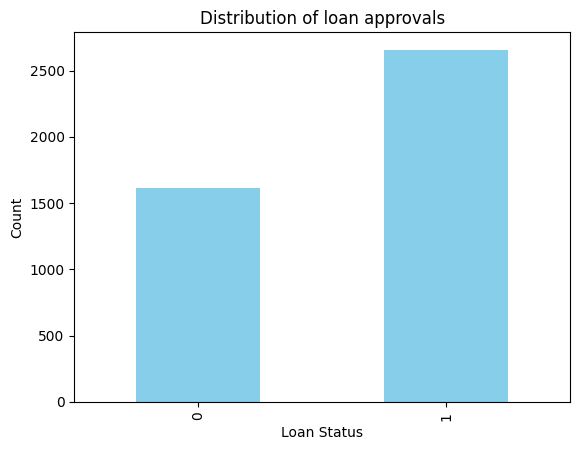

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# The target class
target_col = "loan_status"
loan_approval_data[target_col] = loan_approval_data[target_col].map({
    "Approved": 1,
    "Rejected": 0
})
loan_approval_data[target_col].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Distribution of loan approvals")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

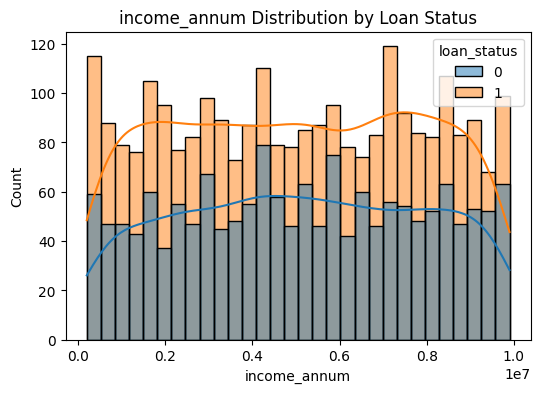

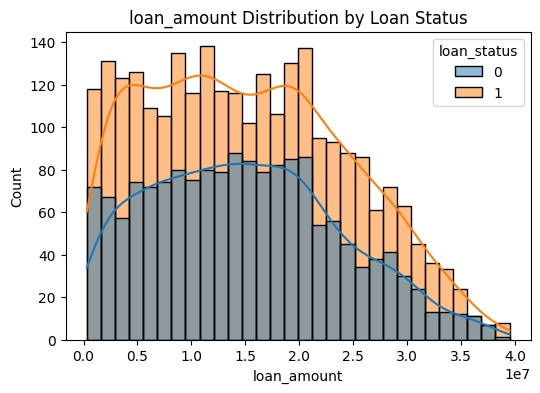

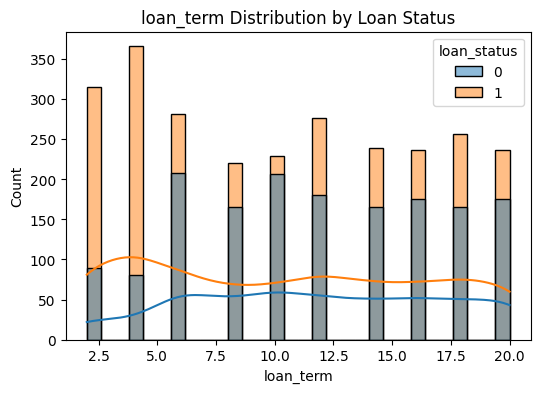

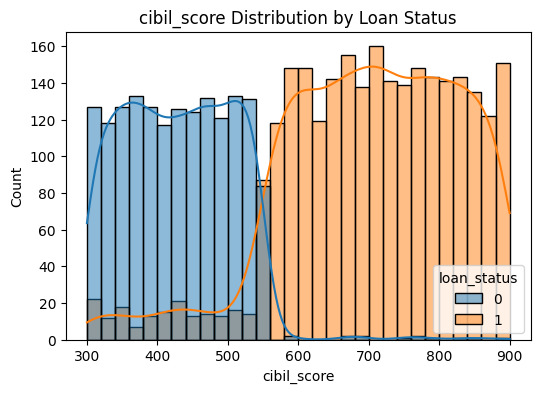

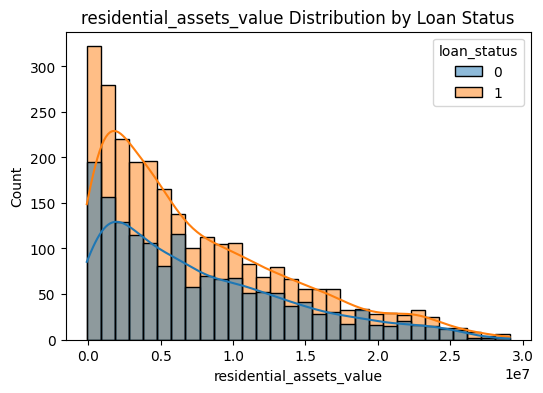

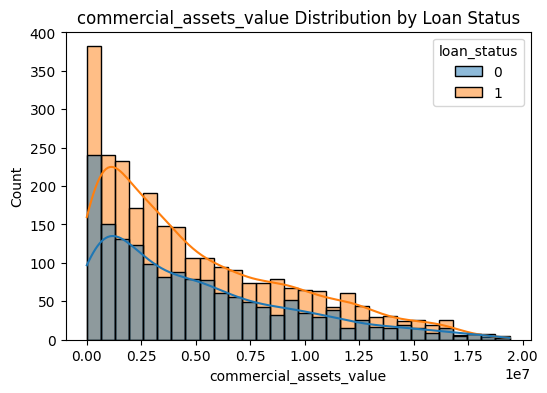

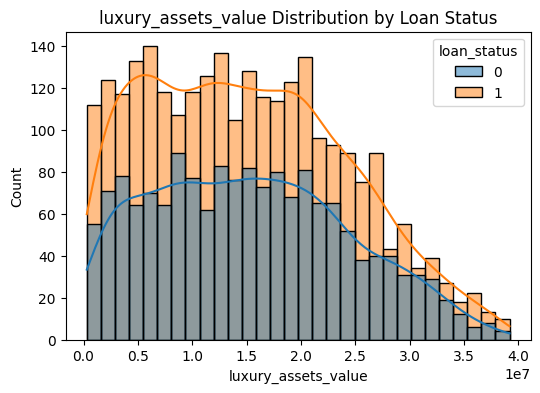

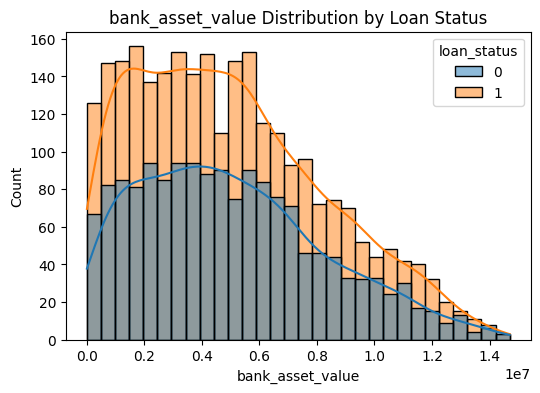

In [8]:
num_cols = [
    "income_annum", "loan_amount", "loan_term",
    "cibil_score", "residential_assets_value",
    "commercial_assets_value", "luxury_assets_value", "bank_asset_value"
]

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=loan_approval_data, x=col, hue="loan_status", kde=True, bins=30)
    plt.title(f"{col} Distribution by Loan Status")
    plt.show()

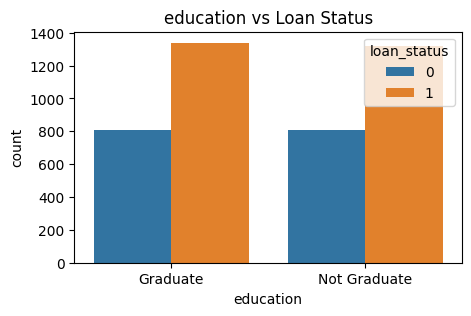

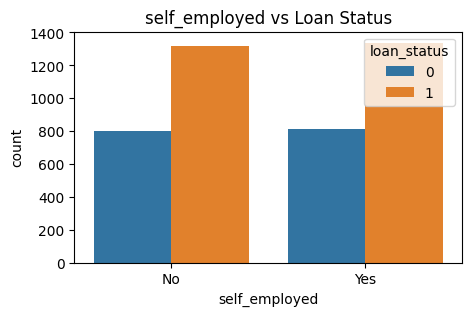

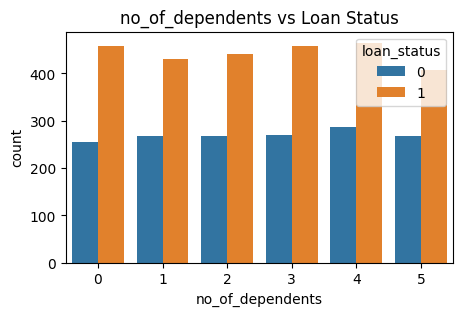

In [9]:
cat_cols = ["education", "self_employed", "no_of_dependents"]

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=loan_approval_data, x=col, hue="loan_status")
    plt.title(f"{col} vs Loan Status")
    plt.show()

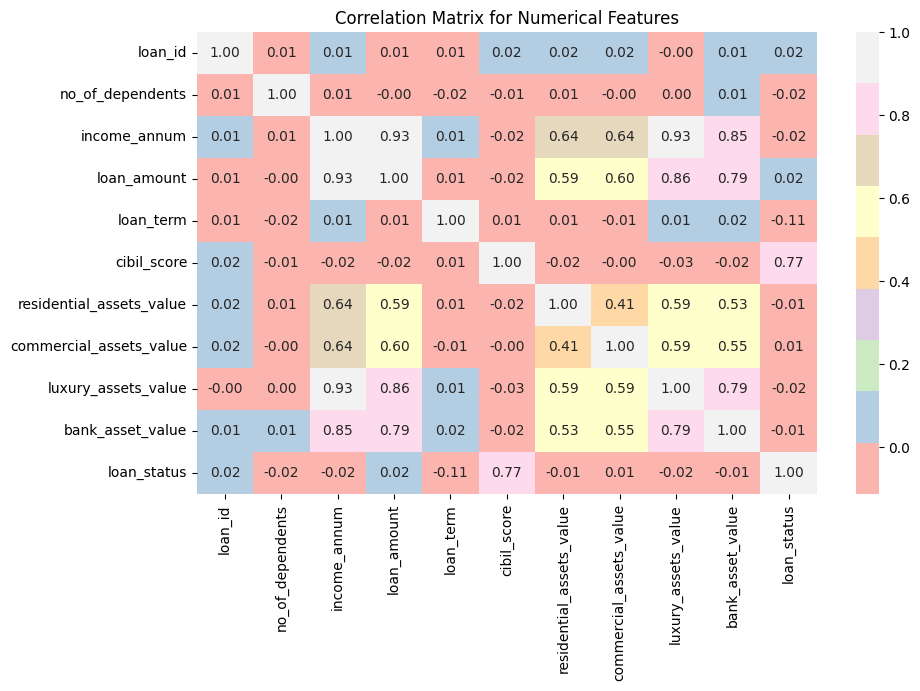

In [12]:
# Computing the correlation matrix for the numerical columns
corr = loan_approval_data.select_dtypes(include=['number']).corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Pastel1', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [13]:
# Selectting the most relevant features 
selected_features = [
    'income_annum',
    'cibil_score',
    'loan_term',
    'no_of_dependents',
    'education',
    'self_employed',
    'loan_status'
]

loan_model_data = loan_approval_data[selected_features].copy()

loan_model_data.head()

,income_annum,cibil_score,loan_term,no_of_dependents,education,self_employed,loan_status
0,9600000,778,12,2,Graduate,No,1
1,4100000,417,8,0,Not Graduate,Yes,0
2,9100000,506,20,3,Graduate,No,0
3,8200000,467,8,3,Graduate,No,0
4,9800000,382,20,5,Not Graduate,Yes,0


In [14]:
# One hot encoding for the categorical features
loan_model_data_encoded = pd.get_dummies(
    loan_model_data,
    columns=['education', 'self_employed'],
    drop_first=True
)

loan_model_data_encoded.head()

,income_annum,cibil_score,loan_term,no_of_dependents,loan_status,education_Not Graduate,self_employed_Yes
0,9600000,778,12,2,1,False,False
1,4100000,417,8,0,0,True,True
2,9100000,506,20,3,0,False,False
3,8200000,467,8,3,0,False,False
4,9800000,382,20,5,0,True,True


In [16]:
from sklearn.model_selection import train_test_split

# Separating the features and the target
features = loan_model_data_encoded.drop('loan_status', axis=1)
target = loan_model_data_encoded['loan_status']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [18]:
from sklearn.linear_model import LogisticRegression

# Initializing and training the binary classification model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
training_results = log_reg.fit(X_train, y_train)

Confusion Matrix:
[[201 122]
 [ 41 490]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       323
           1       0.80      0.92      0.86       531

    accuracy                           0.81       854
   macro avg       0.82      0.77      0.78       854
weighted avg       0.81      0.81      0.80       854



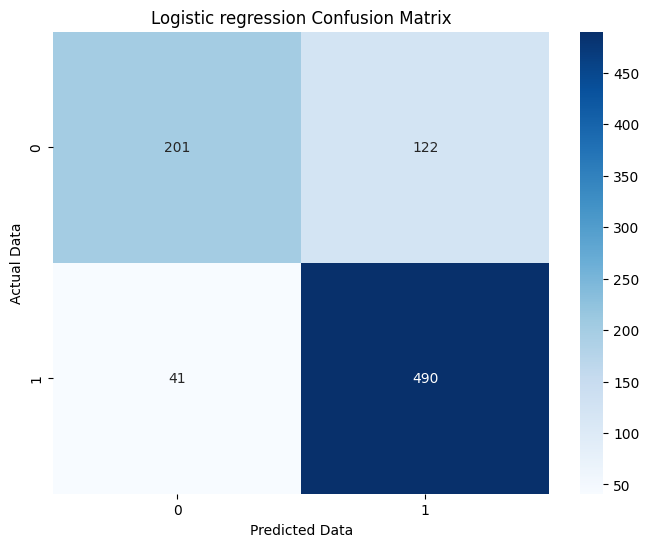

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluating model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# The confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic regression Confusion Matrix")
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

# Applying SMOTE on the imbalanced data and retraining

In [22]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 682.7 kB/s eta 0:00:001m573.1 kB/s eta 0:00:01


In [23]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE only on the training set to avoid data leakage
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: loan_status
1    2125
0    1290
Name: count, dtype: int64
After SMOTE: loan_status
1    2125
0    2125
Name: count, dtype: int64


Logistic Regression (with SMOTE):
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       323
           1       0.82      0.83      0.83       531

    accuracy                           0.78       854
   macro avg       0.77      0.77      0.77       854
weighted avg       0.78      0.78      0.78       854



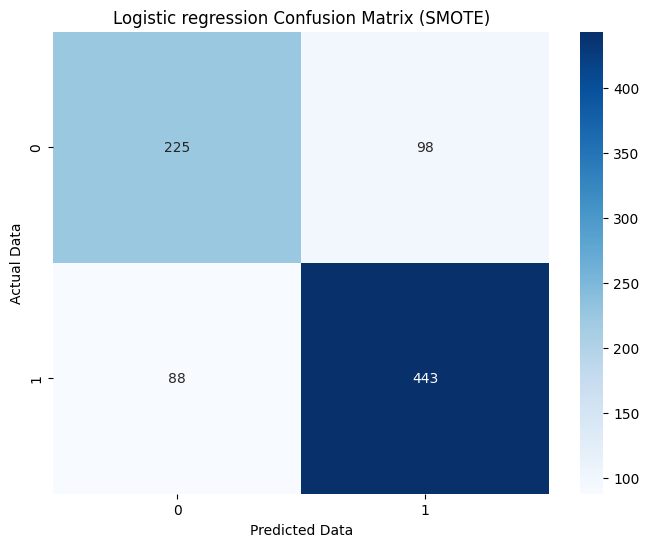

In [27]:
# Retraining the logistic regression model
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_res, y_train_res)

y_pred_smote = log_reg_smote.predict(X_test)

print("Logistic Regression (with SMOTE):")
print(classification_report(y_test, y_pred_smote))

# The confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic regression Confusion Matrix (SMOTE)")
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

## Logistic regression models comparison after balancing the dataset
SMOTE helped the model pay more equal attention to both classes, at the cost of a slight drop in accuracy

Decision Tree (with SMOTE):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       323
           1       0.97      0.95      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



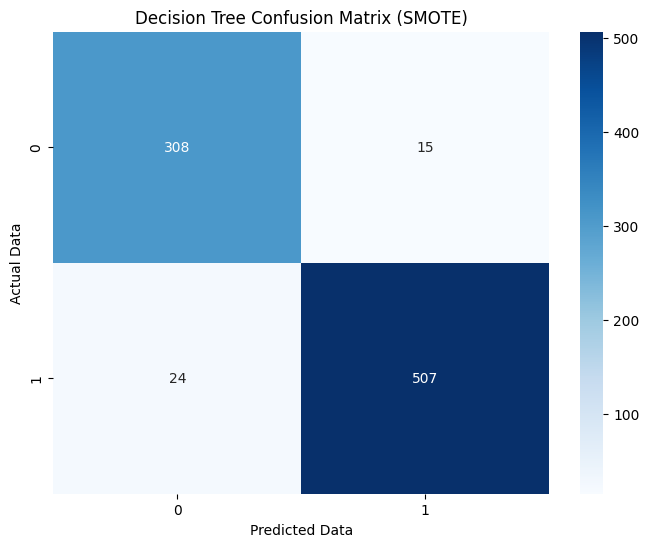

In [28]:
# Training decision tree on the balanced dataset
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_res, y_train_res)

y_pred_dtree = dtree.predict(X_test)

print("Decision Tree (with SMOTE):")
print(classification_report(y_test, y_pred_dtree))

# The confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dtree), annot=True, fmt='d', cmap="Blues")
plt.title("Decision Tree Confusion Matrix (SMOTE)")
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

- The decision tree model outperformed the logistic regression model across all the metrics.
- Trees can model non-linear relationships and interactions between features that Logistic Regression can’t.
- SMOTE helped both models, but the decision tree especially benefits from a balanced dataset because it can now split evenly between classes during training.